# **PROBLEM MISIONARA I KANIBALA - Seminarski rad**

AUTORICA: Petra Salaj

KOLEGIJ: Umjetna inteligencija 2023./24.

# UVOD

Tema ovog seminarskog rada je problem Misionara i kanibala u kojem 3 misionara i 3 kanibala moraju prijeći s jedne strane obale rijeke na drugu koristeći se jednim čamcem. Međutim, moraju biti zadovoljeni uvjeti da se niti u jednom trenutku na jednoj strani obale ne smije nalaziti više kanibala od misionara te da čamac može prevesti najviše dvije osobe i ne može ploviti prazan. Traži se rješenje s najmanjim brojem koraka, odnosno s najmanjim brojem prelazaka rijeke čamcem.

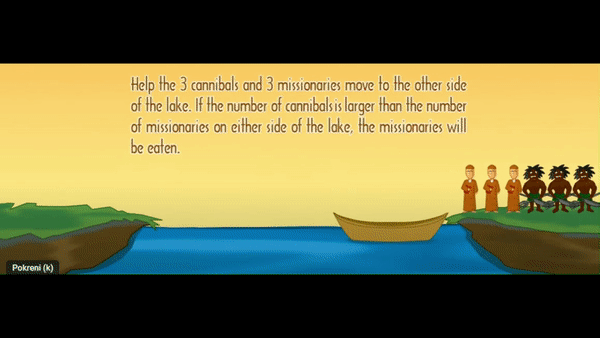

Animacija 1: Optimalno rješenje problema kanibala i misionara (Izvor: https://www.youtube.com/watch?v=uyuhcNdb7DI)


# Opis problema
Pretpostavimo da se svi misionari i kanibali moraju prevesti s lijeve strane (L) obale rijeke na desnu (R). Trenutno stanje `s` ćemo pamtiti pomoću uređene trojke `(m, c, b)` gdje je `m` broj misionara na lijevoj strani obale, `c` broj kanibala na lijevoj strani obale i `b` jednak 1 ako je čamac na lijevoj strani obale ili 0 ako je na desnoj strani. Primijetimo da čamac mora ići s L → R → L → R...(b: 1 → 0 → 1 → 0...). Također, uočimo da je stanje na desnoj strani obale (dok čamac ne vozi) jednoznačno određeno stanjem na lijevoj tj. vrijedi `(m, c, 1) ⇔ (3-m, 3-c, 1-b)` što nam daje da možemo pamtiti samo stanje na lijevoj strani obale. Dakle, imamo trenutno stanje `s = (m, c, b)`, početno stanje `s0 = (3, 3, 1)` i ciljno stanje `(0, 0, 0)`. Problem ćemo riješiti algoritmima pretraživanja stabla u širinu (BFS) i dubinu (DFS). Ideja je konstruirati stablo traženja, u svakom vrhu (čvoru) stabla pamtimo stanje `s = (m, c, b)`. Čvorovi se granaju na temelju pet mogućih akcija prijevoza čamcem; prijevoz 1 misionara, 1 kanibala, 2 misionara, 2 kanibala ili 1 misionara i 1 kanibala. Međutim, potrebno je dodati ograničenje na dopustivost stanja tj. uvjete da na bilo kojoj strani obale ni u jednom trenutku ne smije biti više kanibala nego misionara. Najbolja strategija je uvažiti ove uvjete kod nalaženja sljedbenika stanja jer time skraćujemo pretragu u širinu/veličinu stabla. Na primjer, za stanje (3 ,3 , 1) dopustiv sljedbenik stanja nakon akcije prijevoza 1 misionara i jednog kanibala je (2, 2, 0), dok (2, 3, 0) nakon prijevoza 1 misionara nije. Pogledajmo uvjete na dopustivost iz perspektive lijeve strane obale:

*   ako je m = 0 ⇒ nije bitno koliki je broj kanibala c jer nijedan misionar neće stradati pa je ovo stanje dopustivo
*   ako je m > 0 ⇒ mora vrijediti m ≥ c, primjetimo da je ovime uključen i slučaj c = 0 (jer tada misionari nemaju od koga stradati)
*   ako je m = 3, zbog uvjeta m ≤ 3 i c ≤ 3 sigurno vrijedi m ≥ c pa je ovo stanje dopustivo.

Iz ovoga zaključujemo da je jedino nedopustivo stanje za b = 1 (lijevu stranu) 0 < m < c (≤ 3). Analognim uvjetima za desnu stranu zbog (m, c, 1) ⇔ (3-m, 3-c, 1-b) dobivamo da je jedino nedopustivo stanje za desnu stranu (b = 0) kada vrijedi 0 < 3-m < 3-c (≤ 3). Također, primijetimo da ako je na lijevoj strani ima strogo više misionara nego kanibala (ali ne 3 misionara), tada je na desnoj strani barem jedan misionar i strogo više kanibala pa kako bi stanje bilo dopustivo u slučaju m ≠ 0 i m ≠ 3 mora vrijediti m = c. Dakle, da bi stanje bilo dopustivo mora vrijediti m = 0 ili m = 3 ili m = c.
(Izvor: http://degiorgi.math.hr/~singer/ui/ui_1415/mc.pdf)



# IMPLEMENTACIJA RJEŠENJA

Sljedeći blok koda definira klasu `Node` koja predstavlja čvorove u prostoru stanja za rješavanje problema Kanibala i Misionara. Klasa `Node` ima astribute; `state` za stanje čvora (state[0] = broj misionara, state[1] = broj kanibala i state[2] = položaj čamca 1 za lijevu stranu obale, 0 za desnu stranu obale), `parent` referencu na roditeljski čvor, `action` akciju poduzetu kako bi se došlo do tog stanja i `depth` dubinu čvora u stablu pretraživanja. Metoda `_ _ init _ _` inicijalizira čvor s zadanim stanjem, roditeljskim čvorom, akcijom i dubinom. Također postavlja boju čvora na temelju toga je li u ciljnom stanju, je li stanje u kojem je netko ubijen ili je obično stanje. Metoda `goal_test` provjerava je li trenutno stanje ciljno stanje. Metoda `is_valid` provjerava je li trenutno stanje valjano tj. je li broj misionara/kanibala nenegativan i manji ili jednak 3 te je li položaj čamca 0 ili 1. Metoda `is_killed` provjerava vodi li trenutno stanje smrti misionara. Metoda `generate_child` generira čvorove djecu primjenom valjanih poteza (dodavanjem ili oduzimanjem misionara i kanibala) na temelju položaja čamca. Metoda `find_solution` prati put od trenutnog čvora do korijenskog čvora kako bi pronašla niz akcija koje vode do rješenja.

(Izvor: https://github.com/junthbasnet/Missionaries-and-Cannibals-Problem/blob/master/node.py)

In [ ]:
import pydot #biblioteka za stvaranje čvorova za vizualizaciju

class Node:
    goal_state = [0, 0, 0]
    number_of_instances = 0

    def __init__(self, state, parent, action, depth):
        self.state = state
        self.parent = parent
        self.action = action
        self.depth = depth
        if self.is_killed():
            color = "red"
        elif self.goal_test():
            color = "green"
        else:
            color = "orange"
        self.graph_node = pydot.Node(str(self), style="filled", fillcolor=color)
        Node.number_of_instances += 1

    def __str__(self):
        return str(self.state)

    def goal_test(self):
        if self.state == self.goal_state:
            return True
        return False

    def is_valid(self):
        num_missionary = self.state[0]
        num_cannibal = self.state[1]
        boat = self.state[2]
        if num_missionary < 0 or num_missionary > 3:
            return False
        if num_cannibal < 0 or num_cannibal > 3:
            return False
        if boat > 1 or boat < 0:
            return False
        return True

    def is_killed(self):
        num_missionary = self.state[0]
        num_cannibal = self.state[1]
        if num_cannibal > num_missionary > 0:
            return True
        if num_cannibal < num_missionary < 3: #provjera suprotne strane obale
            return True

    def generate_child(self):
        children = []
        depth = self.depth + 1
        op = -1
        if self.state[2] == 0:
            op = 1
        for x in range(3):
            for y in range(3):
                new_state = self.state.copy()
                new_state[0], new_state[1], new_state[2] = new_state[0] + op * x, new_state[1] + op * y, new_state[2] + op * 1
                action = [x, y, op]
                new_node = Node(new_state, self, action, depth)
                if 1 <= x + y <= 2:
                    children.append(new_node)
        return children

    def find_solution(self):
        solution = []
        solution.append(self.action)
        path = self
        while path.parent != None:
            path = path.parent
            solution.append(path.action)
        solution.reverse()
        return solution

U donjem bloku koda nalazi se funkcija `draw_legend` koja koristi biblioteku `pydot` za stvaranje legende za graf (argument funkcije). Legenda uključuje čvorove koji predstavjaju različita stanja s pripadajućim oznakama i bojama. Stvaramo klaster `graphlegend` kako bi grupirali čvorove legende. Klaster ima oznaku, veličinu fonta, boju, boju fonta, stil, boju popunjavanja i naziv fonta. Definiramo četiri čvora unutar klastera koji predstavljaju različita stanja u legendi: "Processed State", "Killed State", "Impossible State" i "Goal State". Ovi čvorovi imaju određene oblike (plaintext), nazive fontova, veličine fontova i početno su popunjeni različitim bojama. Stvaramo još četiri čvora izvan klastera koji predstavljaju boje povezane sa svakim stanjem u legendi (1 do 4). Ovi čvorovi imaju stil "filled" i različite boje popunjavanja. Zatim, dodajemo klaster legende glavnom grafu. Nakon toga, dodajemo nevidljive bridove između čvorova legende kako bi ih vizualno povezao u ispravnom redoslijedu (Processed State -> Killed State -> Impossible State -> Goal State). Ovi bridovi se stvaraju pomoću `pydot.Edge` s atributom `style="invis"`. Na kraju, dodajemo nevidljive bridove između čvorova boje kako bi ih vizualno povezao u ispravnom redoslijedu (1 -> 2 -> 3 -> 4).

(Izvor: https://github.com/junthbasnet/Missionaries-and-Cannibals-Problem/blob/master/DrawLegend.py)


In [ ]:
import pydot


def draw_legend(graph):
    graphlegend = pydot.Cluster(graph_name="legend", label="Labels", fontsize="20", color="red",
                                fontcolor="blue", style="filled", fillcolor="white", fontname='Arsenal')

    legend1 = pydot.Node('Processed State', shape="plaintext", fontname='Arsenal', fontsize="20")
    graphlegend.add_node(legend1)
    legend2 = pydot.Node("Killed State ", shape="plaintext", fontname='Arsenal', fontsize="20")
    graphlegend.add_node(legend2)
    legend3 = pydot.Node('Impossible State', shape="plaintext", fontname='Arsenal', fontsize="20")
    graphlegend.add_node(legend3)
    legend4 = pydot.Node('Goal State', shape="plaintext", fontname='Arsenal', fontsize="20")
    graphlegend.add_node(legend4)

    node1 = pydot.Node("1", style="filled", fillcolor="orange", label="")
    graphlegend.add_node(node1)
    node2 = pydot.Node("2", style="filled", fillcolor="red", label="")
    graphlegend.add_node(node2)
    node3 = pydot.Node("3", style="filled", fillcolor="blue", label="")
    graphlegend.add_node(node3)
    node4 = pydot.Node("4", style="filled", fillcolor="green", label="")
    graphlegend.add_node(node4)

    graph.add_subgraph(graphlegend)
    graph.add_edge(pydot.Edge(legend1, legend2, style="invis"))
    graph.add_edge(pydot.Edge(legend2, legend3, style="invis"))
    graph.add_edge(pydot.Edge(legend3, legend4, style="invis"))

    graph.add_edge(pydot.Edge(node1, node2, style="invis"))
    graph.add_edge(pydot.Edge(node2, node3, style="invis"))
    graph.add_edge(pydot.Edge(node3, node4, style="invis"))

# BFS - Pretraživanje u širinu

Pretraživanje u širinu je jednostavna, slijepa strategija pretraživanja grafova odnosno prostora stanja. Ideja algoritma je da se nakon proširenja korijenskog čvora, proširuju sva njegova djeca, a zatim sva njihova djeca itd. Općenito, čvorovi na dubini d proširuju se tek nakon što se prošire svi čvorovi na razini d-1, tj. pretražujemo razinu po razinu. Pretraživanje u širinu je optimalno jer se u svakom koraku proširuje najplići čvor (uz pretp. da je cijena prijelaza konstantna) i potpuno (završava u konačno mnogo koraka). (Izvor: http://degiorgi.math.hr/~singer/ui/ui_1415/UI-2-PretrazivanjeProstoraStanja.pdf)


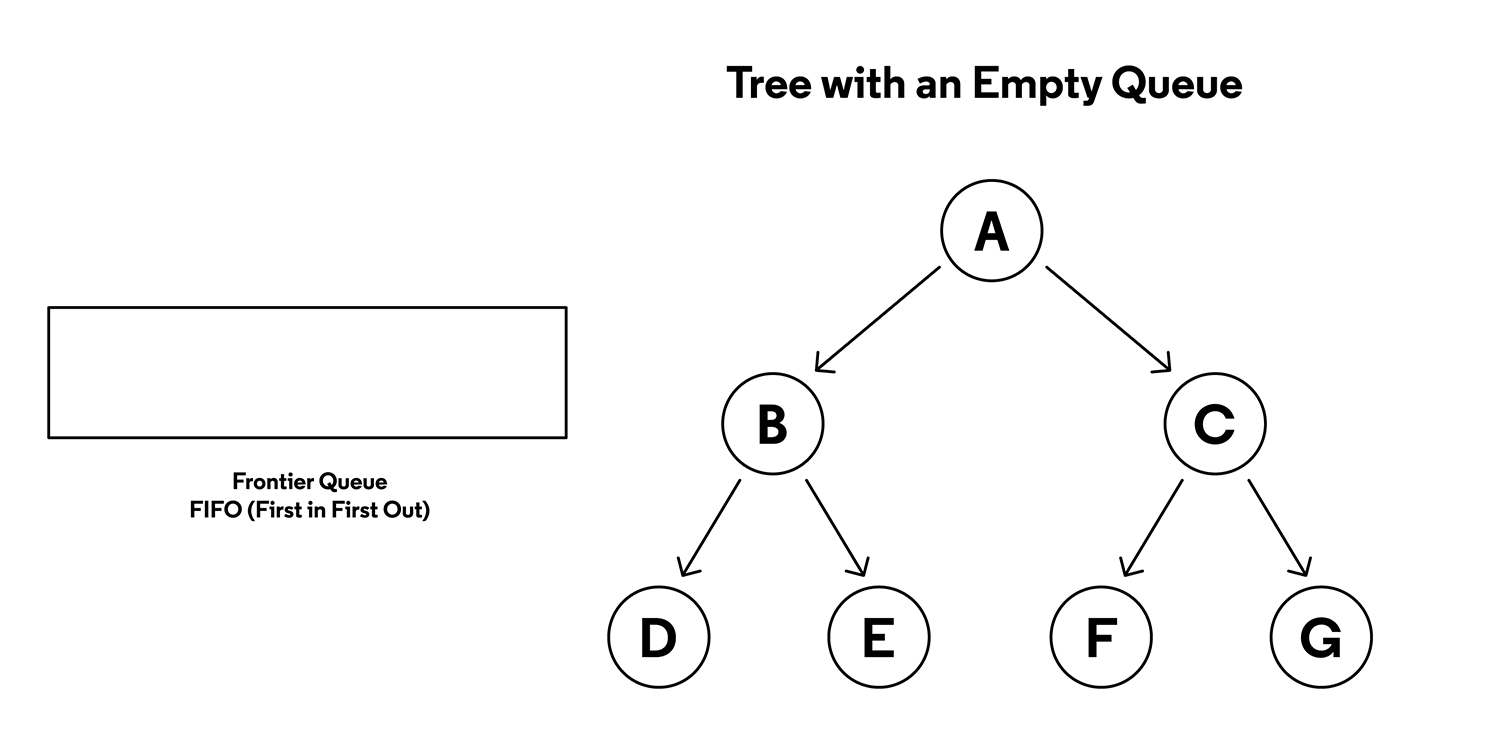

Animacija 2: Primjer pretraživanja u širinu (BFS) na grafu. (Izvor: https://www.codecademy.com/article/tree-traversal)

Donji blok koda implementira algoritam pretraživanja u širinu (BFS) za rješavanje problema Misionara i Kanibala. Najprije se stvara početni čvor `start_node` na temelju početnog stanja. Ako je početno stanje već ciljno, funkcija vraća prazan popis akcija jer nema potrebe za dodatnim pretraživanjem. Glavna petlja BFS-a se izvršava dok ima čvorova u listi `frontier`. Svaki čvor se uzima iz `frontier` i proširuje, a djeca čvora generiraju se pomoću metode `generate_child`. Provjeru ciljnog stanja radimo na sljedeći način; ako se pronađe ciljno stanje, generira se rješenje i dodaju se odgovarajući čvorovi i bridovi u graf. Zatim se graf sprema kao slikovna datoteka `MC_BFS.png`. S druge strane, obradu ubijenih stanja radimo tako da ako je čvor označen kao ubijen, dodaje se u popis ubijenih stanja `killed`. Nakon što se pronađe rješenje, označavaju se listovi grafa koji nisu ubijeni.

(Izvor: https://github.com/junthbasnet/Missionaries-and-Cannibals-Problem/blob/master/BFS_MC.py)


In [ ]:
import pydot
import numpy as np


def bfs(initial_state, mode="BFS"):
    graph = pydot.Dot(graph_type='digraph', label="Missionaries and Cannibals (BFS)", fontsize="30", color="red",
                      fontcolor="black", fontname='Arsenal', fillcolor="black")
    start_node = Node(initial_state, None, None, 0)
    if start_node.goal_test():
        return start_node.find_solution()

    frontier = [start_node]
    explored = []
    killed = []

    print("Pocetni cvor: \ndubina = %d" % start_node.depth)
    print(str(start_node.state))

    while frontier:
        node = frontier.pop(0)
        print("\nCvor koji prosirujemo: \ndubina = " + str(node.depth) + "\n" + str(node.state) + "\n")

        explored.append(node.state)
        graph.add_node(node.graph_node)

        if node.parent:
            diff = np.subtract(node.parent.state, node.state)
            if node.parent.state[2] == 0:
                diff[0], diff[1] = -diff[0], -diff[1]
            graph.add_edge(
                pydot.Edge(node.parent.graph_node, node.graph_node, label=str(diff[0]) + "M  " + str(diff[1]) + "C", fontsize='10', fontcolor='#cc0099'))
        children = node.generate_child()

        if not node.is_killed():
            print("Djeca cvorovi od tog cvora: ", end="")

            for child in children:
                if child.state not in explored:
                    print("\ndubina=%d" % child.depth)
                    print(str(child.state))
                    if child.goal_test():
                        print("CILJNO STANJE postignuto u %d prelaska rijeke\n"% child.depth)
                        graph.add_node(child.graph_node)
                        diff = np.subtract(child.parent.state, child.state)
                        if child.parent.state[2] == 0:
                            diff[0], diff[1] = -diff[0], -diff[1]

                        graph.add_edge(pydot.Edge(child.parent.graph_node, child.graph_node, fontsize='10',
                                                  label=str(diff[0]) + "M  " + str(diff[1]) + "C", fontcolor="#cc0099"))

                        leafs = {n.get_name(): True for n in graph.get_nodes()}
                        for e in graph.get_edge_list():
                            leafs[e.get_source()] = False
                        for leaf in leafs:
                            if leafs[leaf] and str(leaf) not in killed and str(leaf) != "\"[0, 0, 0]\"":
                                node = pydot.Node(leaf, style="filled", fillcolor="blue")
                                graph.add_node(node)

                        draw_legend(graph)
                        graph.write_png('MC_BFS.png')

                        return child.find_solution()
                    if child.is_valid():
                        frontier.append(child)
                        explored.append(child.state)

        else:
            print("Ovaj cvor je ubijen.")
            killed.append("\"" + str(node.state) + "\"")

    return

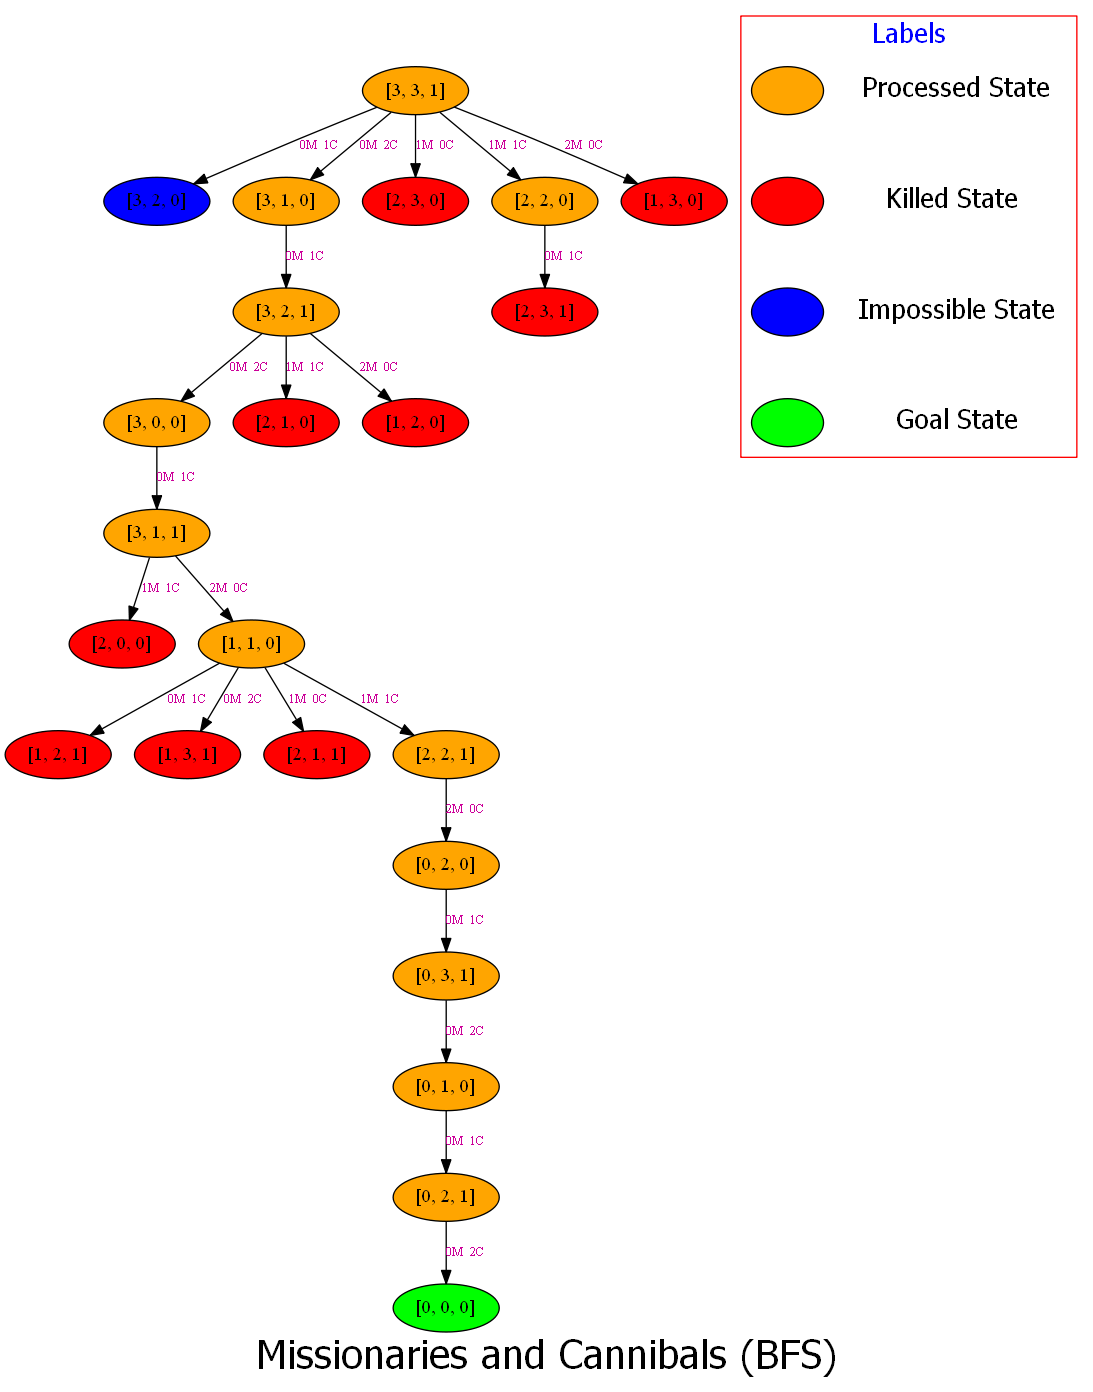

Slika 1(`MC_BFS.png`): stablo pretraživanja BFS algoritma
(Izvor: https://github.com/junthbasnet/Missionaries-and-Cannibals-Problem/blob/master/MC_BFS.png)

Dubina stabla na kojoj se nalazi cilj je 11 (korijen stabla je na dubini 0), odnosno algoritam daje rješenje nakon 11 prelazaka čamcem. Rješenje je označeno narančastom bojom pa ga možemo isčitati sa stabla pretraživanja. Sva nemoguća stanja označena su plavom bojom, a sva nedopustiva stanja (kada je broj kanibala veći od broja misionara) označena su crvenom bojom.

# DFS - Pretraživanje u dubinu

Algoritam za pretraživanje u dubinu (DFS) uvijek prvo proširuje najdublji čvor u stablu pretraživanja. Postupak se vraća na pliće razine kada dosegne listove. Za razliku od BFS algoritma, pretraživanje u dubinu (DFS) nije potpuno (može zaglaviti u beskonačnoj petlji) i nije optimalno (jer pretražuje razinu po razinu). Upravo iz ovih razloga pretraživanje u dubinu treba izbjegavati kod stabla pretraživanja čija je maksimalna dubina velika ili beskonačna. (Izvor: http://degiorgi.math.hr/~singer/ui/ui_1415/UI-2-PretrazivanjeProstoraStanja.pdf)

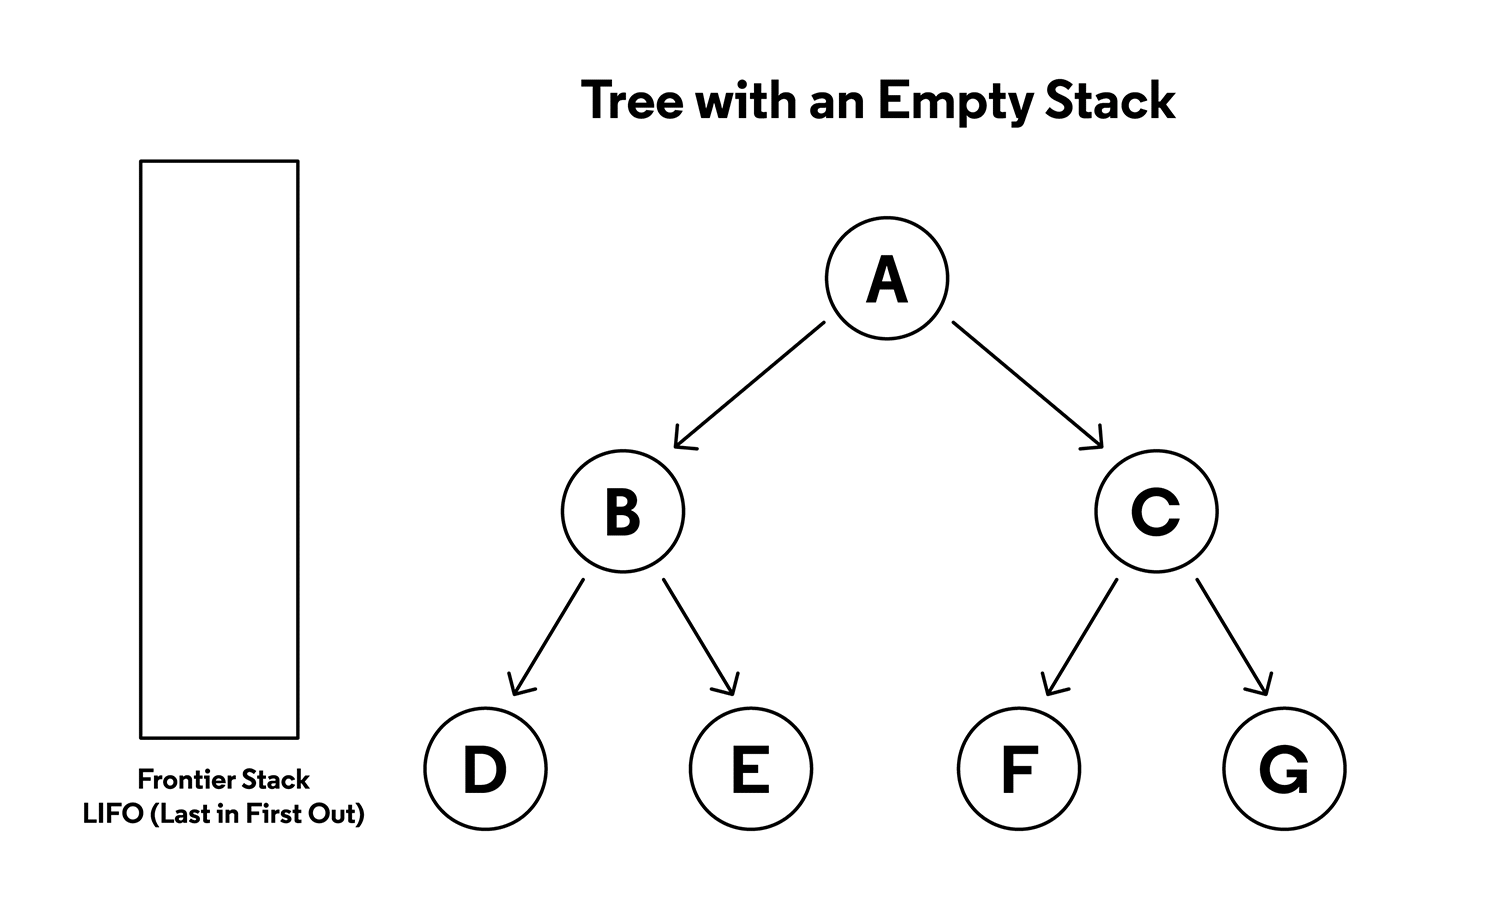

Animacija 3: Primjer pretraživanja u dubinu (DFS) na grafu. (Izvor: https://www.codecademy.com/article/tree-traversal)

Analogno prethodnom bloku koda, sljedeći implementira algoritam za pretraživanje prostora stanja u dubinu(DFS) za rješavanje problema Misionara i Kanibala. Graf se koristi za vizualizaciju čvorova i bridova, a također se generira legenda koja prikazuje boje različitih stanja.

(Izvor: https://github.com/junthbasnet/Missionaries-and-Cannibals-Problem/blob/master/DFS_MC.py)

In [ ]:
import pydot
import numpy as np
from collections import deque



def dfs(initial_state):
    graph = pydot.Dot(graph_type='digraph', label=" Missionaries and Cannibals (DFS) ", color="yellow",
                      fontcolor="black", fontname='Arsenal', style="filled", fillcolor="blue", fontsize="30")
    start_node = Node(initial_state, None, None, 0)
    if start_node.goal_test():
        return start_node.find_solution()

    frontier = deque()
    frontier.append(start_node)
    explored = []
    killed = []

    print("Pocetni cvor: \ndubina=%d" % start_node.depth)
    print(str(start_node.state))
    while frontier:
        node = frontier.pop()
        print("\nCvor koji prosirujemo: \nDubina=" + str(node.depth) + "\n" + str(node.state) + "\n")
        explored.append(node.state)
        graph.add_node(node.graph_node)

        if node.parent:
            diff = np.subtract(node.parent.state, node.state)
            if node.parent.state[2] == 0:
                diff[0], diff[1] = -diff[0], -diff[1]
            graph.add_edge(
                pydot.Edge(node.parent.graph_node, node.graph_node, label=str(diff[0]) + "M  " + str(diff[1]) + "C",
                           fontsize='10', fontcolor='#cc0099'))
        children = node.generate_child()
        if not node.is_killed():
            print("Djeca cvorovi tog cvora: ", end="")
            for child in children:
                if child.state not in explored:
                    print("\ndubina=%d" % child.depth)
                    print(str(child.state))
                    if child.goal_test():
                        print("CILJNO STANJE postignuto u %d prelaska rijeke\n"% child.depth)
                        graph.add_node(child.graph_node)
                        diff = np.subtract(child.parent.state, child.state)
                        if child.parent.state[2] == 0:
                            diff[0], diff[1] = -diff[0], -diff[1]

                        graph.add_edge(pydot.Edge(child.parent.graph_node, child.graph_node, fontsize='10',
                                                  label=str(diff[0]) + "M  " + str(diff[1]) + "C", fontcolor="#cc0099"))

                        leafs = {n.get_name(): True for n in graph.get_nodes()}
                        for e in graph.get_edge_list():
                            leafs[e.get_source()] = False
                        for leaf in leafs:
                            if leafs[leaf] and str(leaf) not in killed and str(leaf) != "\"[0, 0, 0]\"":
                                node = pydot.Node(leaf, style="filled", fillcolor="blue")
                                graph.add_node(node)

                        draw_legend(graph)
                        graph.write_png('MC_DFS.png')

                        return child.find_solution()
                    if child.is_valid():
                        frontier.append(child)
                        explored.append(child.state)

        else:
            print("Ovaj cvor je ubijen.")
            killed.append("\"" + str(node.state) + "\"")
    return

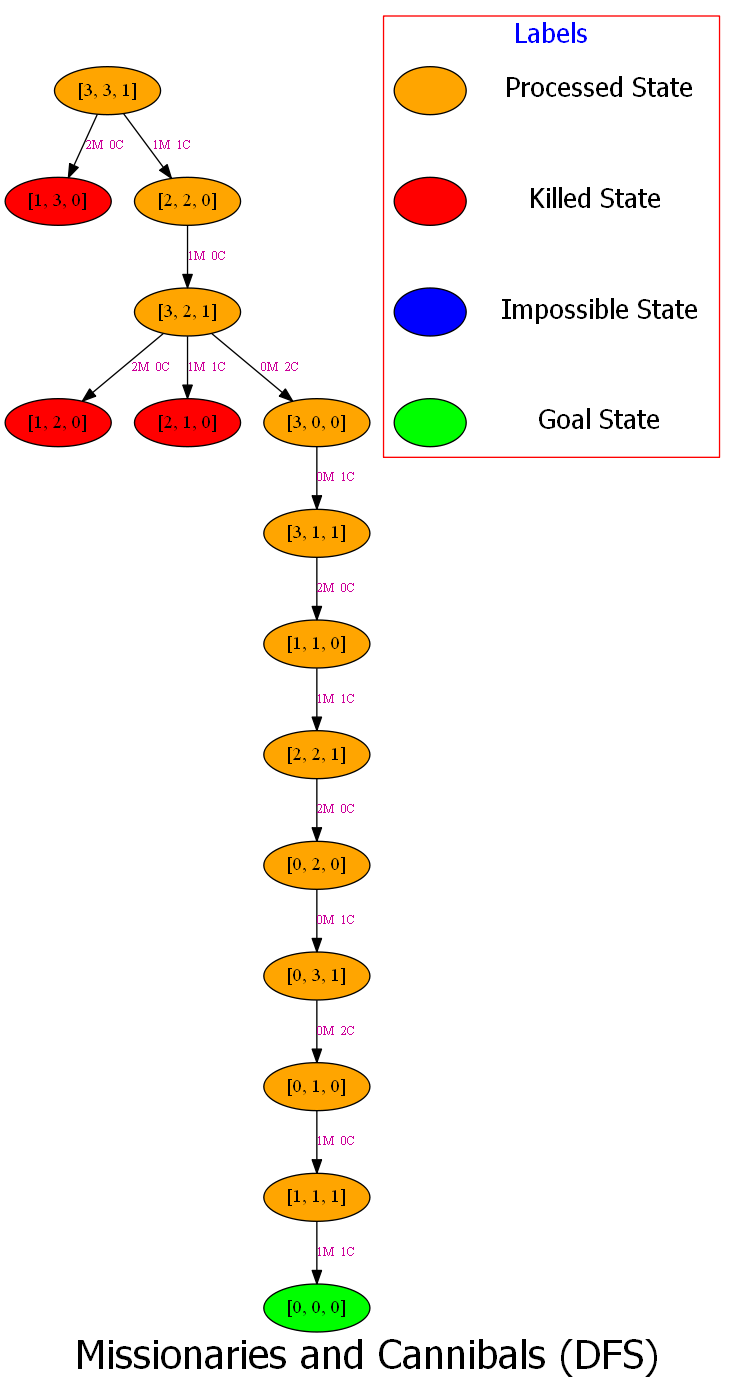

Slika 2(`MC_DFS.png`): stablo pretraživanja DFS algoritma
(Izvor: https://github.com/junthbasnet/Missionaries-and-Cannibals-Problem/blob/master/MC_DFS.png)

Iduća dva kodna bloka mjere i prikazuju rezultate izvođenja BFS-a i DFS-a na problemu kanibala i misionara. Prikazuju pronađeno rješenje, ukupan broj generiranih instanci klase `Node` te ukupno vrijeme izvođenja pretraživanja.

(Izvor: https://github.com/junthbasnet/Missionaries-and-Cannibals-Problem/blob/master/main.py, postoji greška u kodu koju sam ispravila)

In [ ]:
from time import time

initial_state = [3, 3, 1] #postavlja pocetno stanje

Node.number_of_instances = 0 #postavlja brojac instanci klase na 0
t0 = time()
solution = bfs(initial_state)
t1 = time() - t0 #izračunava vrijeme izvođenja pretrazivanja

print('BFS rjesenje:', solution)
print('BFS prostor stanja:', Node.number_of_instances)
print('BFS Vrijeme:', t1, 'sekundi')

Pocetni cvor: 
dubina = 0
[3, 3, 1]

Cvor koji prosirujemo: 
dubina = 0
[3, 3, 1]

Djeca cvorovi od tog cvora: 
dubina=1
[3, 2, 0]

dubina=1
[3, 1, 0]

dubina=1
[2, 3, 0]

dubina=1
[2, 2, 0]

dubina=1
[1, 3, 0]

Cvor koji prosirujemo: 
dubina = 1
[3, 2, 0]

Djeca cvorovi od tog cvora: 
dubina=2
[3, 4, 1]

dubina=2
[4, 2, 1]

dubina=2
[4, 3, 1]

dubina=2
[5, 2, 1]

Cvor koji prosirujemo: 
dubina = 1
[3, 1, 0]

Djeca cvorovi od tog cvora: 
dubina=2
[3, 2, 1]

dubina=2
[4, 1, 1]

dubina=2
[4, 2, 1]

dubina=2
[5, 1, 1]

Cvor koji prosirujemo: 
dubina = 1
[2, 3, 0]

Ovaj cvor je ubijen.

Cvor koji prosirujemo: 
dubina = 1
[2, 2, 0]

Djeca cvorovi od tog cvora: 
dubina=2
[2, 3, 1]

dubina=2
[2, 4, 1]

dubina=2
[4, 2, 1]

Cvor koji prosirujemo: 
dubina = 1
[1, 3, 0]

Ovaj cvor je ubijen.

Cvor koji prosirujemo: 
dubina = 2
[3, 2, 1]

Djeca cvorovi od tog cvora: 
dubina=3
[3, 0, 0]

dubina=3
[2, 1, 0]

dubina=3
[1, 2, 0]

Cvor koji prosirujemo: 
dubina = 2
[2, 3, 1]

Ovaj cvor je ubijen.

Cvor

In [ ]:
from time import time

initial_state = [3, 3, 1]
Node.number_of_instances = 0 #u izvornom kodu nedostaje vracanje brojaca instanci klase na 0
t2 = time()
solution = dfs(initial_state)
t3 = time() - t2
print('DFS Solution:', solution)
print('DFS prostor stanja:', Node.number_of_instances)
print('DFS Vrijeme:', t3, 'sekundi')

Pocetni cvor: 
dubina=0
[3, 3, 1]

Cvor koji prosirujemo: 
Dubina=0
[3, 3, 1]

Djeca cvorovi tog cvora: 
dubina=1
[3, 2, 0]

dubina=1
[3, 1, 0]

dubina=1
[2, 3, 0]

dubina=1
[2, 2, 0]

dubina=1
[1, 3, 0]

Cvor koji prosirujemo: 
Dubina=1
[1, 3, 0]

Ovaj cvor je ubijen.

Cvor koji prosirujemo: 
Dubina=1
[2, 2, 0]

Djeca cvorovi tog cvora: 
dubina=2
[2, 3, 1]

dubina=2
[2, 4, 1]

dubina=2
[3, 2, 1]

dubina=2
[4, 2, 1]

Cvor koji prosirujemo: 
Dubina=2
[3, 2, 1]

Djeca cvorovi tog cvora: 
dubina=3
[3, 0, 0]

dubina=3
[2, 1, 0]

dubina=3
[1, 2, 0]

Cvor koji prosirujemo: 
Dubina=3
[1, 2, 0]

Ovaj cvor je ubijen.

Cvor koji prosirujemo: 
Dubina=3
[2, 1, 0]

Ovaj cvor je ubijen.

Cvor koji prosirujemo: 
Dubina=3
[3, 0, 0]

Djeca cvorovi tog cvora: 
dubina=4
[3, 1, 1]

dubina=4
[4, 0, 1]

dubina=4
[4, 1, 1]

dubina=4
[5, 0, 1]

Cvor koji prosirujemo: 
Dubina=4
[3, 1, 1]

Djeca cvorovi tog cvora: 
dubina=5
[3, -1, 0]

dubina=5
[2, 0, 0]

dubina=5
[1, 1, 0]

Cvor koji prosirujemo: 
Dubina=5
[1,

# Usporedba BFS i DFS algoritma - vremenska i prostorna složenost

BFS algoritam posjećuje sve čvorove grafa na svakoj razini prije prelaska na idući razinu. U najgorem slučaju BFS će proći sve čvorove i sve bridove grafa pa je njegova vremenska složenost O(V+E) gdje je V broj vrhova (čvorova) grafa i E broj bridova. U BFS algoritmu generirane čvorove uvijek dodajemo na kraj reda otvorenih čvorova Q (listi `frontier` u gornjoj implementaciji). U najgorem slučaju (kad je graf potpun) svi vrhovi će biti spremljeni u redu, prema čemu je prostorna složenost O(V). S druge strane, DFS algoritam uvijek proširuje najdublji čvor u stablu pretraživanja te se vraća na pliće razine tek kada dosegne listove.U najgorem slučaju, DFS posjećuje sve vrhove i bridove pa je njegova vremenska složenost također O(V+E). Kod DFS algoritma generirane čvorove dodajemo na početak stoga pa njegova prostorna složenost DFS algoritma ovisi o dubini grafa (broju vrhova spremljenih u stogu). Dakle, u najgorem slučaju (kada je graf dubine V-1) prostorna složenost DFS algoritma je O(V). (Izvor: https://techsauce.medium.com/time-complexity-and-space-complexity-of-dfs-and-bfs-algorithms-671217e43d58)

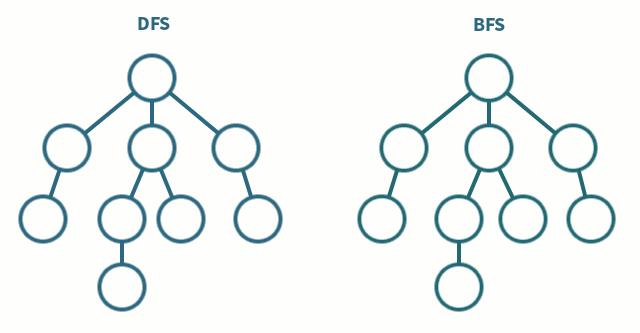

Animacija 3: Primjer BFS i DFS algoritma na istom grafu (Izvor: https://medium.com/analytics-vidhya/a-quick-explanation-of-dfs-bfs-depth-first-search-breadth-first-search-b9ef4caf952c)

# ZAKLJUČAK
Gornja implementacija za problem kanibala i misionara nam za BFS algoritam daje broj čvorova u prostoru stanja 199 i vrijeme izvođenja 0.5303919315338135 sekundi. S druge strane, implementacija DFS algoritma daje broj čvorova u prostoru stanja 127 i vrijeme izvođenja 0.1524064540863037 sekundi. Zaključujemo da u problemu Misionara i Kanibala, u kojem maksimalna dubina grafa nije prevelika, algoritam za pretraživanje u dubinu (DFS) daje bolje rezultate od BFS algoritma vremenski, a i memorijski je manje zahtjevan.

# LITERATURA
https://www.youtube.com/watch?v=uyuhcNdb7DI

http://degiorgi.math.hr/~singer/ui/ui_1415/mc.pdf

https://github.com/junthbasnet/Missionaries-and-Cannibals-Problem/tree/master

https://www.codecademy.com/article/tree-traversal

 https://techsauce.medium.com/time-complexity-and-space-complexity-of-dfs-and-bfs-algorithms-671217e43d58

  https://medium.com/analytics-vidhya/a-quick-explanation-of-dfs-bfs-depth-first-search-breadth-first-search-b9ef4caf952c

